In [1]:
from scipy.ndimage import correlate
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
from skimage.filters import median, gaussian, prewitt, prewitt_h, prewitt_v, threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 

In [2]:
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

# Exercise 1

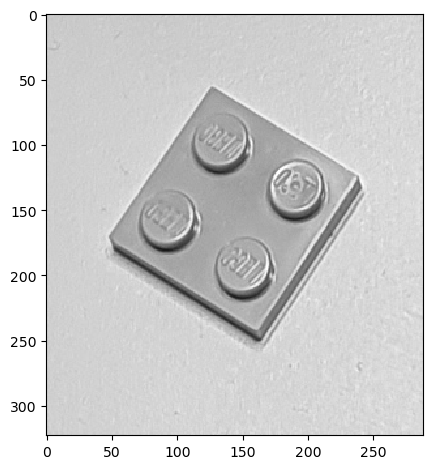

In [3]:
im_org = io.imread("data/lego_5.png", as_gray=True)
io.imshow(im_org)

Otsu threshold: 0.7103125574448529


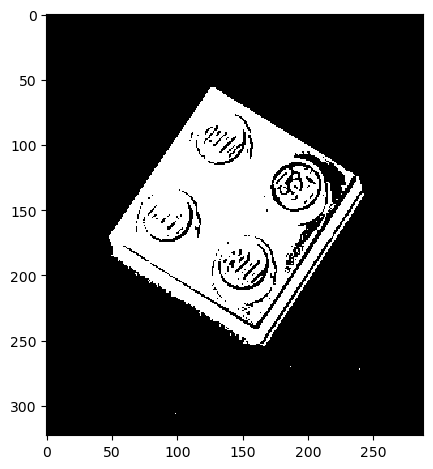

In [4]:
# Find OTSU threshold
otsu = threshold_otsu(im_org)
print(f"Otsu threshold: {otsu}")

# Compute binary image
bin_img = im_org < otsu
io.imshow(bin_img)

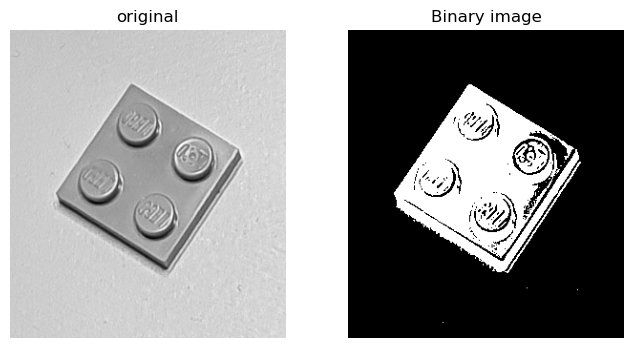

In [5]:
plot_comparison(im_org, bin_img, 'Binary image')

# Exercise 2

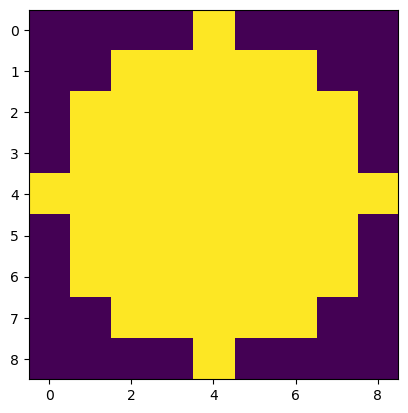

In [6]:
footprint = disk(4)
plt.imshow(footprint)

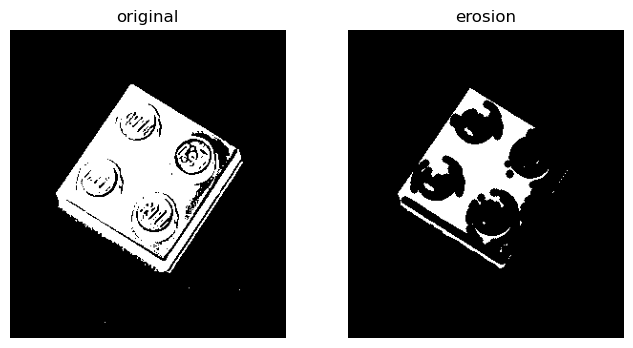

In [7]:
eroded = erosion(bin_img, footprint)
plot_comparison(bin_img, eroded, 'erosion')

Bigger disk erodes more of the foreground

# Exercise 3

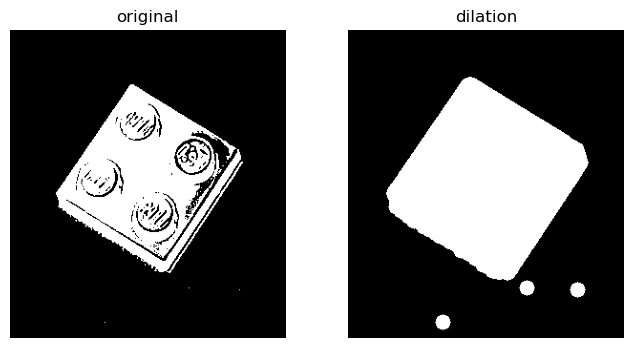

In [8]:
footprint = disk(8)
dilated = dilation(bin_img, footprint)
plot_comparison(bin_img, dilated, 'dilation')

# Exercise 4

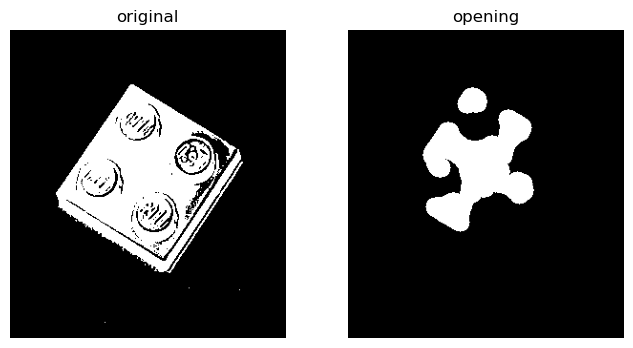

In [9]:
footprint = disk(10)
opened = opening(bin_img, footprint)
plot_comparison(bin_img, opened, 'opening')

# Exercise 5

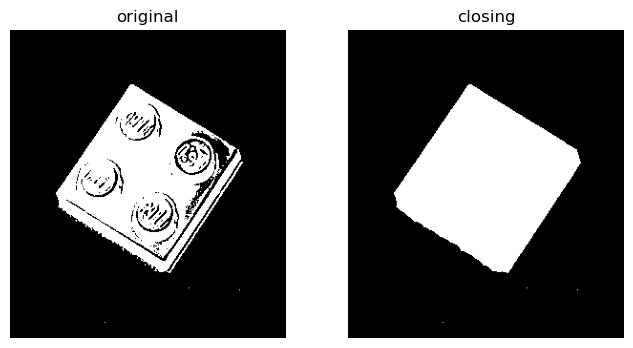

In [10]:
footprint = disk(10)
closed = closing(bin_img, footprint)
plot_comparison(bin_img, closed, 'closing')

This works pretty well

# Exercise 6

In [11]:
def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline

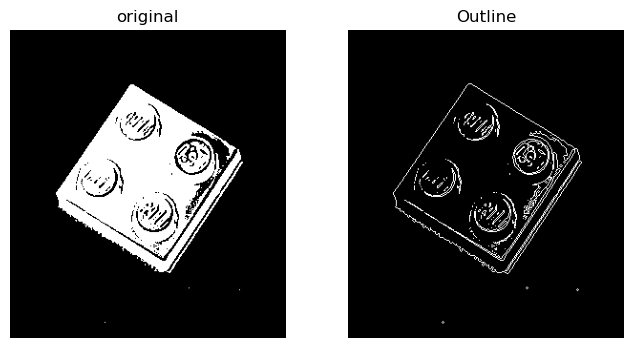

In [12]:
outline = compute_outline(bin_img)
plot_comparison(bin_img, outline, 'Outline')

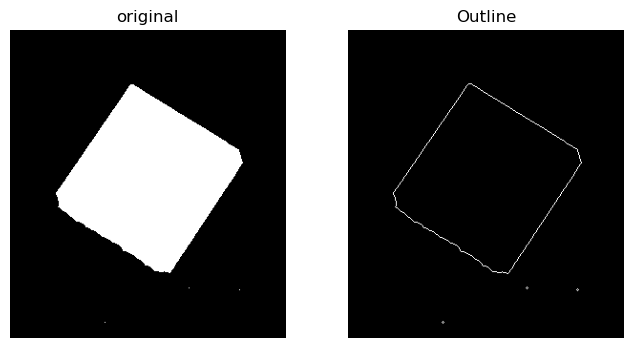

In [13]:
outline = compute_outline(closed)
plot_comparison(closed, outline, 'Outline')

# Exercise 7

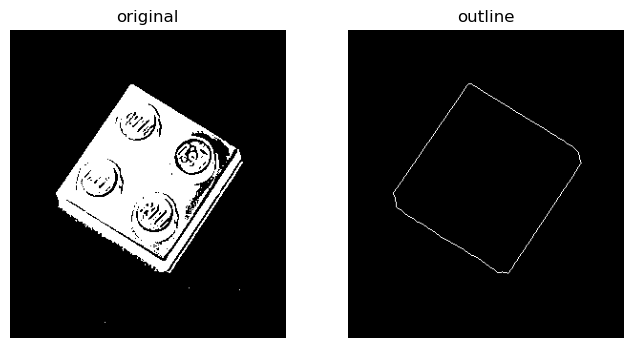

In [14]:
opened = opening(bin_img, disk(1))
closed = closing(opened, disk(15))
outline = compute_outline(closed)
plot_comparison(bin_img, outline, 'outline')

This works well to remove the noise and outline the whole brick

# Exercise 8

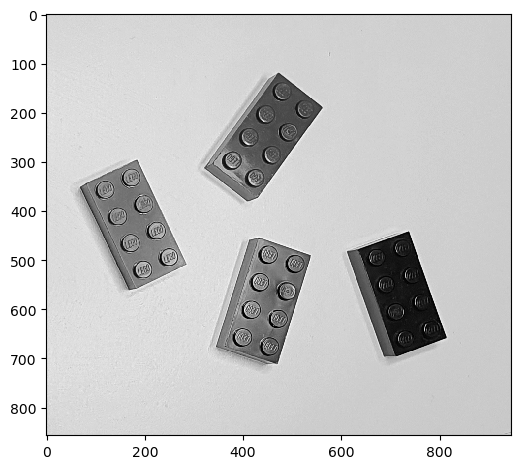

In [15]:
im_org = io.imread("data/lego_7.png", as_gray=True)
io.imshow(im_org)

Otsu threshold: 0.5710768405330883


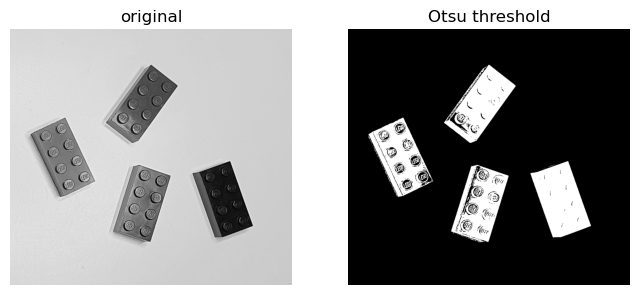

In [16]:
otsu = threshold_otsu(im_org)
print(f"Otsu threshold: {otsu}")
bin_img = im_org < otsu
plot_comparison(im_org, bin_img, "Otsu threshold")


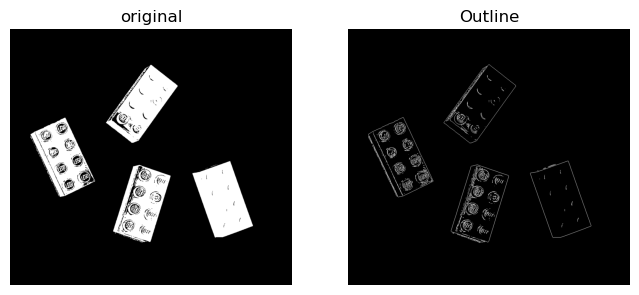

In [17]:
outline = compute_outline(bin_img)
plot_comparison(bin_img, outline, 'Outline')

# Exercise 9

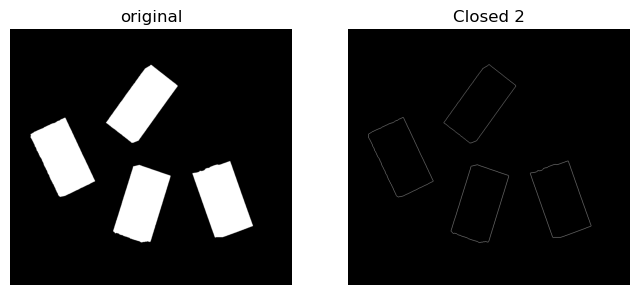

In [18]:
# We use opening because the bricks are the "holes" that need to be opened
footprint = disk(10)
closed = closing(bin_img, footprint)
outline = compute_outline(closed)
plot_comparison(closed, outline, 'Closed 2')

# Exerise 10

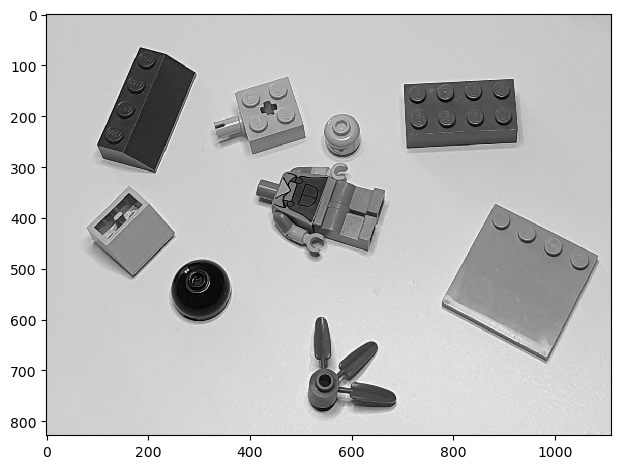

In [19]:
im_org = io.imread("data/lego_3.png", as_gray=True)
io.imshow(im_org)

Otsu threshold: 0.5860621698835784


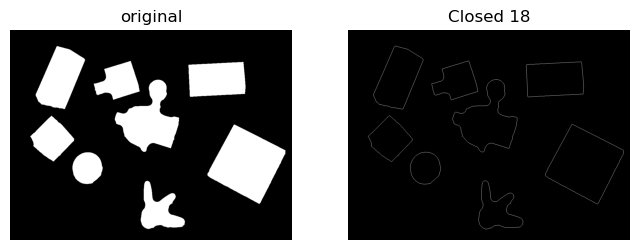

In [20]:
otsu = threshold_otsu(im_org)
print(f"Otsu threshold: {otsu}")
bin_img = im_org < otsu
footprint = disk(18)
closed = closing(bin_img, footprint)
outline = compute_outline(closed)
plot_comparison(closed, outline, 'Closed 18')

We need a bigger footprint to make the outline only contain the edges of the object.

# Exercise 11

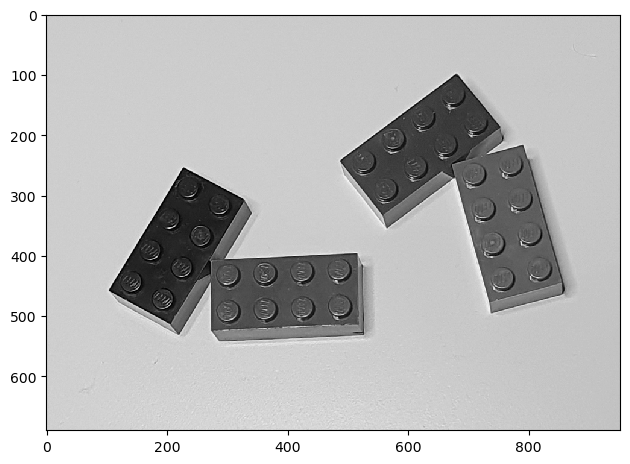

In [21]:
im_org = io.imread("data/lego_9.png", as_gray=True)
io.imshow(im_org)

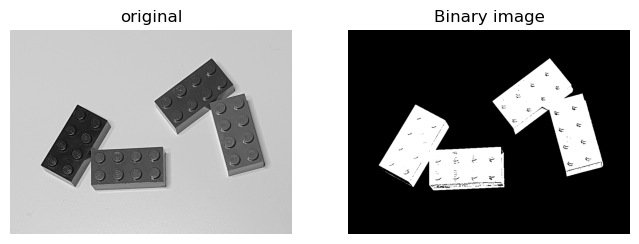

In [22]:
otsu = threshold_otsu(im_org)
bin_img = im_org < otsu
plot_comparison(im_org, bin_img, 'Binary image')

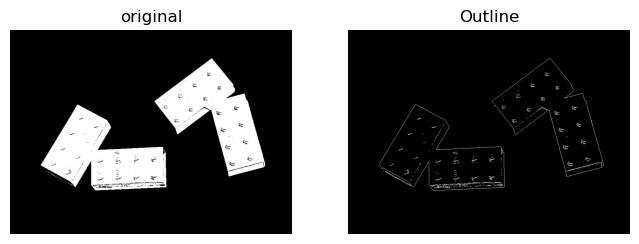

In [23]:
# Compute outline
outline = compute_outline(bin_img)
plot_comparison(bin_img, outline, 'Outline')

Since the items are touching the outline encompasses multiple bricks

# Exercise 12

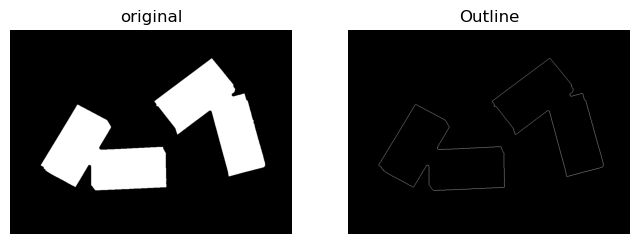

In [24]:
footprint = disk(5)
closed = closing(bin_img, footprint)
outline = compute_outline(closed)
plot_comparison(closed, outline, 'Outline')

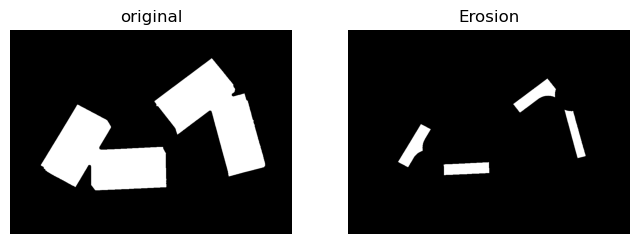

In [25]:
# Erode until the objects are seperated
footprint = disk(50)
eroded = erosion(closed, footprint)
plot_comparison(closed, eroded, 'Erosion')

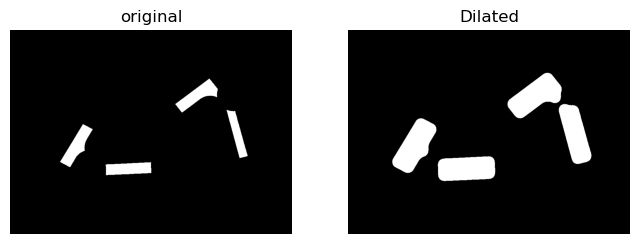

In [26]:
# Dilate
footprint = disk(20)
dilated = dilation(eroded, footprint)
plot_comparison(eroded, dilated, 'Dilated')

# Exercise 15

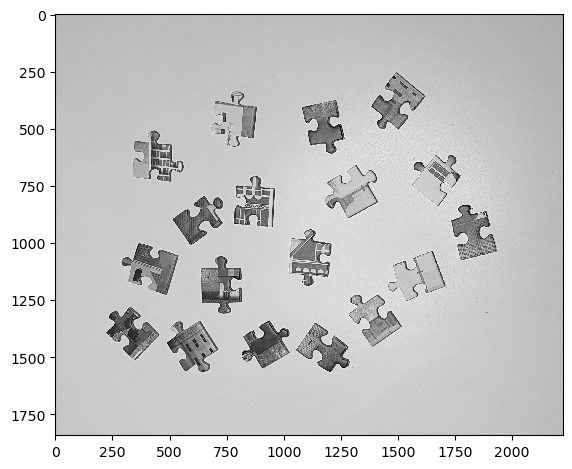

In [27]:
im_org = io.imread("data/puzzle_pieces.png", as_gray=True)
io.imshow(im_org)

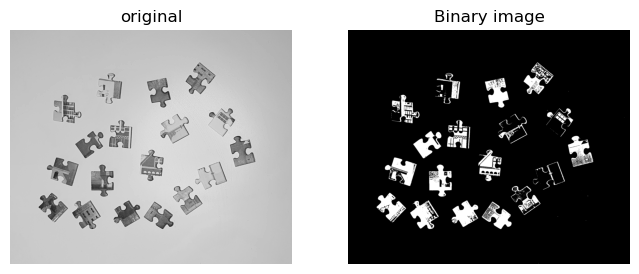

In [28]:
otsu = threshold_otsu(im_org)
bin_img = im_org < otsu
plot_comparison(im_org, bin_img, 'Binary image')

# Exercise 16

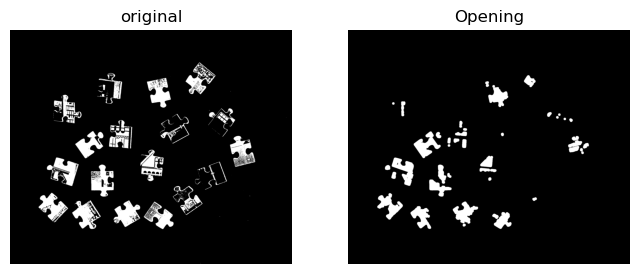

In [29]:
footprint = disk(10)
opened = opening(bin_img, footprint)
plot_comparison(bin_img, opened, 'Opening')

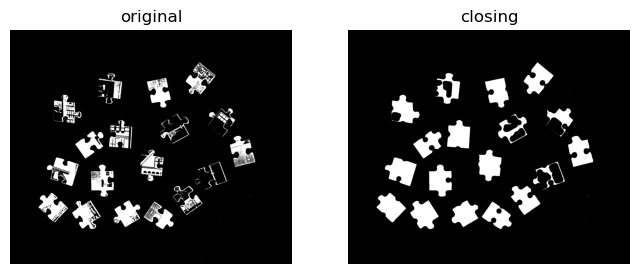

In [30]:
footprint = disk(20)
closed = closing(bin_img, footprint)
plot_comparison(bin_img, closed, 'closing')

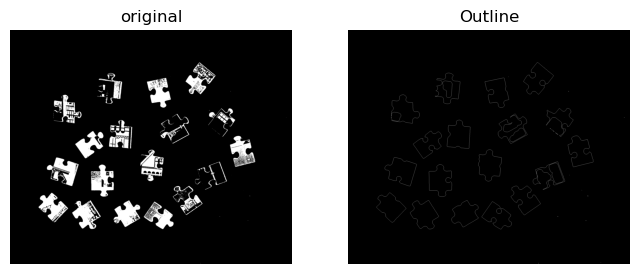

In [31]:
# Outline
outlined = compute_outline(closed)
plot_comparison(bin_img, outlined, 'Outline')

Outline isn't very good since the puzzle pieces are not solid colors